# How many wraiths are there in the Necropolis of Warsaw?
## Part 1. Date of Death

### Setup

Locate the `src` directory and attach it to `sys.path`. Import libraries and the local utils code.

In [22]:
from pathlib import Path
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils.timeline import Timeline
from utils.interpolations import (
    build_timeline_interpolation,
    build_ephemeral_dict,
    extended_to_sequence_of_inputs,
)


def project_path_iter():
    for p in Path.cwd().parts:
        if p == REPO_NAME:
            yield p
            return
        yield p


REPO_NAME = 'data-science-playground'
REPO_PATH = Path(*project_path_iter())
SRC_PATH = REPO_PATH / 'src'
PROJECT_PATH = REPO_PATH / 'how_many_wraiths'

if SRC_PATH not in sys.path:
    sys.path.append(str(SRC_PATH))

## Input data

The most important fragment of the data is size of alive population of the City and the mortality factor. Both are taken as linear interpolation as a function of time, basing on available sources[1][2]. The second source of information about population is a set of estimates of the biggest death-bringing events (plagues, starvations, wars). They are given as `additional_deaths`, annual.

Other important input is a period of observations: I assume it starts as soon as 1500 (earliest estimations) and lasts to 1980 (the moment when my storyline begins). 

Lastly, there are some interpolations of _a priori_ factors, taken as a rule of thumb. Their role in the model will be described later.

Sources:
1. [Demography of Warsaw (Wikipedia; in Polish)](
https://pl.wikipedia.org/wiki/Ludno%C5%9B%C4%87_Warszawy) 
2. [Historical demography of Poland (academic pdf; in Polish)](
http://mbc.cyfrowemazowsze.pl/Content/18436/Historia%20Polski%20w%20Liczbach_1994%20198147.pdf)

In [25]:
tl = Timeline.load(str(PROJECT_PATH / 'how_many_wraiths_timeline.yaml'))
START_YEAR = tl.start
END_YEAR = tl.end
years = list(range(START_YEAR, END_YEAR + 1))

df = pd.DataFrame(index=years)
df['alive'] = build_timeline_interpolation(tl, 'alive')(years)
df['additional_deaths'] = pd.Series(build_ephemeral_dict(tl.property('additional_deaths')), dtype='int32')
df['additional_deaths'].fillna(0)
df['mortality_rate'] = build_timeline_interpolation(tl, 'mortality_rate')(years)

## Model

In [26]:
df['deaths'] = df.apply(lambda row: int(row.alive * row.mortality_rate) + row.additional_deaths, axis=1)
df['wraith_population'] = 0

TypeError: ("unsupported operand type(s) for *: 'float' and 'generator'", 'occurred at index 1500')

##### Survivability

In [ ]:
enfant_oblivion_rate = build_timeline_interpolation(tl, 'enfant_oblivion_rate')
senior_oblivion_rate = build_timeline_interpolation(tl, 'senior_oblivion_rate')

## Visualization

Deaths annualy

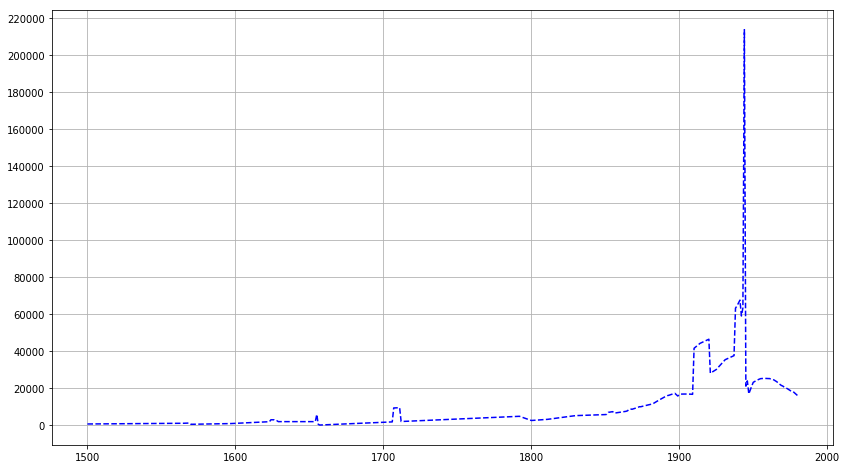

In [19]:
def build_figure(y_max, y_ticks):
    figure = plt.figure(figsize=(14, 8))
    ax = figure.gca()
    ax.set_xticks(np.arange(START_YEAR, END_YEAR + 21, 100))
    ax.set_yticks(np.arange(0, y_max, y_ticks))
    plt.grid()
    return figure


# deaths_values = list(deaths(period))
# build_figure(240001, 20000)
# plt.plot(period, deaths_values, 'b--')
# plt.show()
df['deaths'].plot()

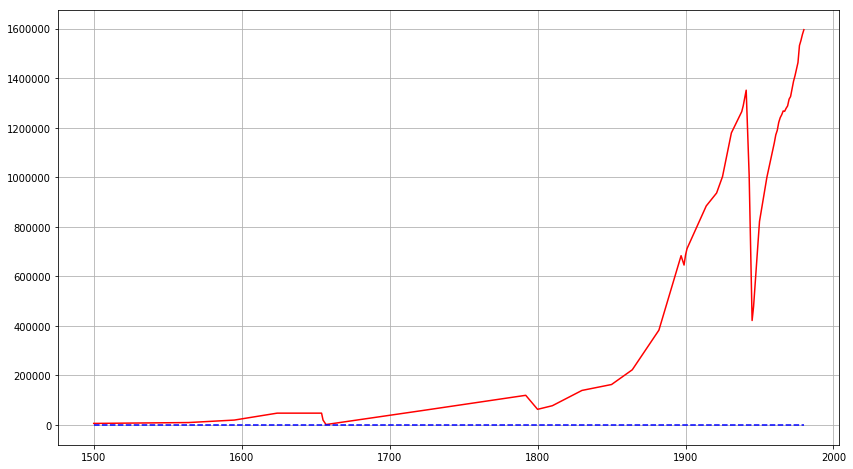

In [20]:
alive_population_values = list(alive_population(period))
wraith_population_values = list(wraith_population(period))

build_figure(1600001, 200000)
plt.plot(period, alive_population_values, 'r-', period, wraith_population_values, 'b--')
plt.show()